In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# load dataset
dataset = pd.read_csv('train.csv',index_col=None)
dataset = dataset[dataset.columns[[1,2,3,6,7,9,10,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34]]]
dataset = pd.get_dummies(dataset, drop_first=True)

In [3]:
X, y = dataset.drop('Loan Status',axis=1), dataset['Loan Status']

In [4]:
# Synthetic Minority Oversampling Technique 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20, random_state = 0)

## k-Fold Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score
randomforest_classifier = RandomForestClassifier(n_estimators=100 , random_state = 42)
accuracies = cross_val_score(estimator = randomforest_classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.61 %
Standard Deviation: 0.16 %


In [7]:
# training
randomforest_classifier = RandomForestClassifier(n_estimators=100 ,min_samples_split=2,\
                                                 min_samples_leaf=1, max_features = 'sqrt',\
                                                 max_depth= None, bootstrap = False, random_state = 42)
randomforest_classifier.fit(X_train, y_train)
y_pred = randomforest_classifier.predict(X_test)

In [8]:
cn_matrix = confusion_matrix(y_test, y_pred)
cn_matrix

array([[11211,   994],
       [ 1549, 10735]])

In [9]:
from sklearn.metrics import classification_report
labels = ['Not loan defaulter','loan defaulter']
print(classification_report(y_test, y_pred, target_names=labels))

                    precision    recall  f1-score   support

Not loan defaulter       0.88      0.92      0.90     12205
    loan defaulter       0.92      0.87      0.89     12284

          accuracy                           0.90     24489
         macro avg       0.90      0.90      0.90     24489
      weighted avg       0.90      0.90      0.90     24489



In [10]:
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(y_test, y_pred)
cn_matrix

array([[11211,   994],
       [ 1549, 10735]])

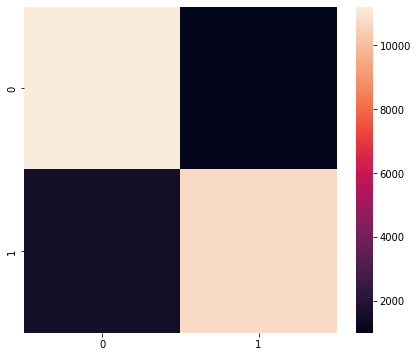

In [11]:
# Confusion matrix RandomForestClassifier
rcParams['figure.figsize'] = 7, 6
sns.heatmap(cn_matrix, annot=False, cbar=True,fmt='g')
plt.savefig('RandomForestClassifier_v2.png', dpi=720);
plt.show()

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(randomforest_classifier, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = pd.Series(result.importances_mean,index=[*X_test.columns])
feature_importances = feature_importances[feature_importances  > 0.03].sort_values(ascending=False, axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


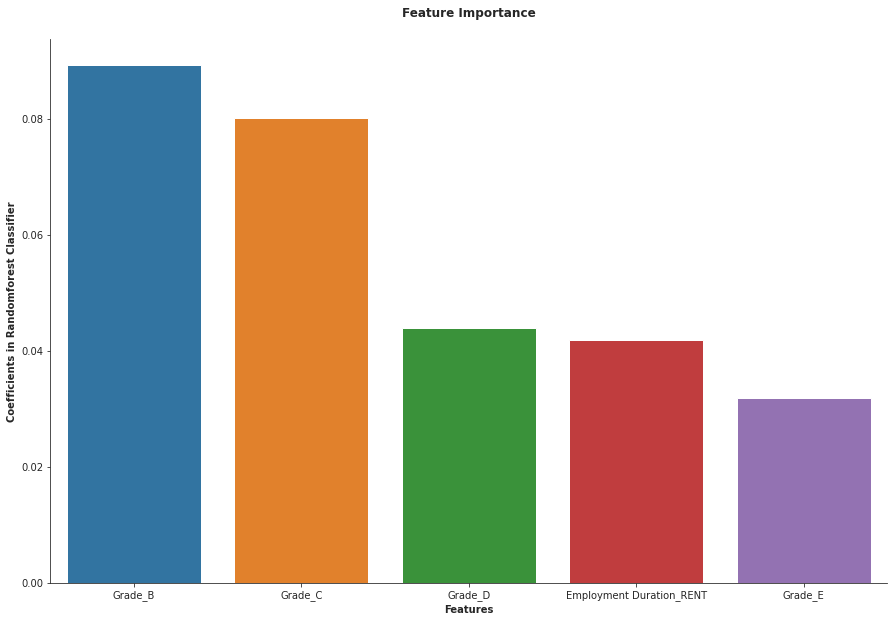

In [13]:
sns.set_style('ticks')
rcParams['figure.figsize'] = 15, 10
sns.barplot(feature_importances.index, feature_importances.values)
plt.title('Feature Importance', fontsize=12, fontweight='bold',y=1.03)
plt.ylabel('Coefficients in Randomforest Classifier',fontweight='bold');
plt.xlabel('Features',fontweight='bold');
sns.despine()
# plt.savefig('randomforest_Classifier_FeatureImportance_Final.png', dpi=720);
plt.show()